<a href="https://colab.research.google.com/github/kurav/CMPE257-Fall23-Varshith-Kura/blob/Homework-3/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:

# Load the training dataset
train_data = pd.read_csv('ZipDigits.train', header=None, delim_whitespace=True)

# Filter and convert labels for binary classification (1 and 5)
train_data_binary = train_data[train_data[0].isin([1, 5])]

In [15]:
import numpy as np

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1.0 - np.tanh(x)**2

def forward_propagation(X, W1, b1, W2, b2):
    # Input layer
    a1 = X
    # Hidden layer
    z2 = np.dot(W1, a1) + b1
    a2 = tanh(z2)
    # Output layer
    z3 = np.dot(W2, a2) + b2
    a3 = tanh(z3)

    return a1, z2, a2, z3, a3

def backward_propagation(X, Y, a1, z2, a2, z3, a3, W2):
    # Output layer
    delta3 = 2 * (a3 - Y) * tanh_derivative(z3)
    dW2 = np.dot(delta3, a2.T)
    db2 = np.sum(delta3, axis=1, keepdims=True)
    # Hidden layer
    delta2 = np.dot(W2.T, delta3) * tanh_derivative(z2)
    dW1 = np.dot(delta2, a1.T)
    db1 = np.sum(delta2, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

def compute_cost(a3, Y):
    return np.mean((a3 - Y)**2)




In [36]:
print("Sample of ZipDigits.train dataset:")
print(train_data.head())
num_samples = train_data.shape[0]

print(f"Number of samples in ZipDigits.train: {num_samples}")

Sample of ZipDigits.train dataset:
   0    1    2    3      4      5      6      7      8      9    ...    247  \
0  6.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -0.631  0.862  ...  0.304   
1  5.0 -1.0 -1.0 -1.0 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853  ... -0.671   
2  4.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000  ... -1.000   
3  7.0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.273  0.684  0.960  0.450  ... -0.318   
4  3.0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.928 -0.204  0.751  0.466  ...  0.466   

     248    249    250    251    252    253    254    255  256  
0  0.823  1.000  0.482 -0.474 -0.991 -1.000 -1.000 -1.000 -1.0  
1 -0.671 -0.033  0.761  0.762  0.126 -0.095 -0.671 -0.828 -1.0  
2 -1.000 -1.000 -0.109  1.000 -0.179 -1.000 -1.000 -1.000 -1.0  
3  1.000  0.536 -0.987 -1.000 -1.000 -1.000 -1.000 -1.000 -1.0  
4  0.639  1.000  1.000  0.791  0.439 -0.199 -0.883 -1.000 -1.0  

[5 rows x 257 columns]
Number of samples in ZipDigits.train: 7291


In [17]:
# Load the training dataset
train_data = pd.read_csv('ZipDigits.train', header=None, delim_whitespace=True)

# Filter and convert labels for binary classification (1 and 5)
train_data_binary = train_data[train_data[0].isin([1, 5])]
train_data_binary[0] = train_data_binary[0].apply(lambda x: 1 if x == 1 else -1)

# Extract features and labels
X_train = train_data_binary.iloc[:, 1:].values.T  # Features (transpose for compatibility with the neural network)
Y_train = train_data_binary.iloc[:, 0].values.reshape(1, -1)  # Labels

# Normalize the pixel values to the range [0, 1]
X_train = X_train / 255.0

<ipython-input-17-8f98a666f6ed>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_binary[0] = train_data_binary[0].apply(lambda x: 1 if x == 1 else -1)


In [22]:
def train_binary_classification_neural_network(X, Y, learning_rate, num_epochs, m, batch_size=None):
    num_samples = X.shape[1]
    num_features = X.shape[0]

    # Initialize weights and biases
    W1 = np.random.randn(m, num_features)
    b1 = np.zeros((m, 1))
    W2 = np.random.randn(1, m)
    b2 = np.zeros((1, 1))

    costs = []  # List to store costs for each iteration

    for epoch in range(num_epochs):
        total_cost = 0

        # Shuffle the training data for each epoch
        shuffled_indices = np.random.permutation(num_samples)
        X_shuffled = X[:, shuffled_indices]
        Y_shuffled = Y[:, shuffled_indices]

        # Determine whether to use SGD or mini-batch GD based on batch_size
        if batch_size is None or batch_size == 1:
            # Use SGD (one sample per iteration)
            batches = [(i, i + 1) for i in range(num_samples)]
        else:
            # Use mini-batch GD with the specified batch size
            batches = [(i, min(i + batch_size, num_samples)) for i in range(0, num_samples, batch_size)]

        # Loop over batches
        for start_idx, end_idx in batches:
            x_batch = X_shuffled[:, start_idx:end_idx]
            y_batch = Y_shuffled[:, start_idx:end_idx]

            # Forward propagation
            a1, z2, a2, z3, a3 = forward_propagation(x_batch, W1, b1, W2, b2)

            # Backward propagation
            dW1, db1, dW2, db2 = backward_propagation(x_batch, y_batch, a1, z2, a2, z3, a3, W2)

            # Update weights and biases
            W1 -= learning_rate * dW1
            b1 -= learning_rate * db1
            W2 -= learning_rate * dW2
            b2 -= learning_rate * db2

            # Compute cost for monitoring
            cost_i = compute_cost(a3, y_batch)
            total_cost += cost_i

            # Record cost for each iteration
            costs.append(total_cost)

        # Average cost over all samples in the epoch
        average_cost = total_cost / num_samples

        print(f"Epoch {epoch+1}/{num_epochs}, Average Cost: {average_cost}")

    return W1, b1, W2, b2, costs



Epoch 1/100, Average Cost: 0.8723597350948246
Epoch 2/100, Average Cost: 0.5840981695618997
Epoch 3/100, Average Cost: 0.35725763566072505
Epoch 4/100, Average Cost: 0.2167957697109839
Epoch 5/100, Average Cost: 0.13947155822222773
Epoch 6/100, Average Cost: 0.10325052242867289
Epoch 7/100, Average Cost: 0.07934122348912676
Epoch 8/100, Average Cost: 0.06411942112184706
Epoch 9/100, Average Cost: 0.05317020974860103
Epoch 10/100, Average Cost: 0.04591845579428806
Epoch 11/100, Average Cost: 0.03916785254881767
Epoch 12/100, Average Cost: 0.0366443405846264
Epoch 13/100, Average Cost: 0.03541115932769167
Epoch 14/100, Average Cost: 0.02955333231288251
Epoch 15/100, Average Cost: 0.027572311290634702
Epoch 16/100, Average Cost: 0.02436764500213827
Epoch 17/100, Average Cost: 0.024790588286488037
Epoch 18/100, Average Cost: 0.021678727890164114
Epoch 19/100, Average Cost: 0.019431578161121465
Epoch 20/100, Average Cost: 0.021275353115059927
Epoch 21/100, Average Cost: 0.01999399462381306


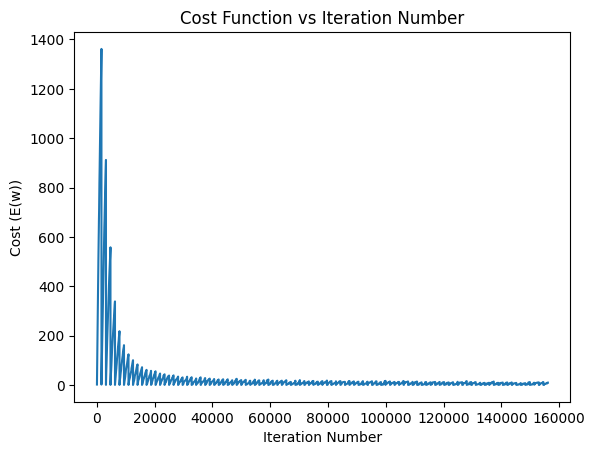

In [28]:
learning_rate = 0.01
num_epochs = 100  # This is just an example, you can set the desired number of epochs
m = 10  # Number of hidden units

# SGD (batch_size=None or batch_size=1)
W1_sgd, b1_sgd, W2_sgd, b2_sgd, costs_sgd = train_binary_classification_neural_network(X_train, Y_train, learning_rate, num_epochs, m, batch_size=1)


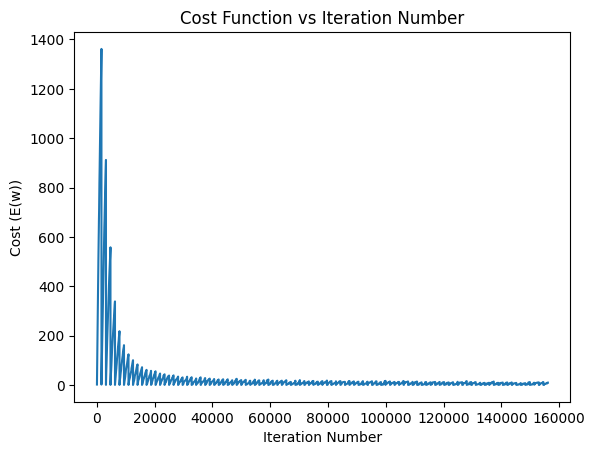

In [30]:
plt.plot(costs_sgd)
plt.xlabel('Iteration Number')
plt.ylabel('Cost (E(w))')
plt.title('Cost Function vs Iteration Number')
plt.show()

In [32]:
# Assuming you already have the trained weights W1, b1, W2, b2 from the training phase
# Also assuming the sign function is available

# Forward propagation to make predictions on the training set
_, _, _, _, train_predictions = forward_propagation(X_train, W1_sgd, b1_sgd, W2_sgd, b2_sgd)

# Convert predictions to binary labels using the sign function
binary_train_predictions = np.sign(train_predictions)

# Calculate Ein (classification error on the training set)
ein = np.mean(binary_train_predictions != Y_train)
print(f"Ein (Training Error): {ein * 100:.2f}%")

# Load and preprocess the test dataset
test_data = pd.read_csv('ZipDigits.test', header=None, delim_whitespace=True)
test_data_binary = test_data[test_data[0].isin([1, 5])]
test_data_binary[0] = test_data_binary[0].apply(lambda x: 1 if x == 1 else -1)
X_test = test_data_binary.iloc[:, 1:].values.T / 255.0  # Normalize the pixel values
Y_test = test_data_binary.iloc[:, 0].values.reshape(1, -1)

# Forward propagation to make predictions on the test set
_, _, _, _, test_predictions = forward_propagation(X_test, W1_sgd, b1_sgd, W2_sgd, b2_sgd)

# Convert predictions to binary labels using the sign function
binary_test_predictions = np.sign(test_predictions)

# Calculate the test error
test_error = np.mean(binary_test_predictions != Y_test)
print(f"Test Error: {test_error * 100:.2f}%")


Ein (Training Error): 0.06%
Test Error: 1.18%


<ipython-input-32-91a8e483c7a0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_binary[0] = test_data_binary[0].apply(lambda x: 1 if x == 1 else -1)


In [33]:
batch_size = 32
W1_mini_batch, b1_mini_batch, W2_mini_batch, b2_mini_batch, costs_mini_batch = train_binary_classification_neural_network(X_train, Y_train, learning_rate, num_epochs, m, batch_size=batch_size)

Epoch 1/100, Average Cost: 0.02810210600367033
Epoch 2/100, Average Cost: 0.02766127557916679
Epoch 3/100, Average Cost: 0.025589841815799985
Epoch 4/100, Average Cost: 0.025888659280798344
Epoch 5/100, Average Cost: 0.026004631678941376
Epoch 6/100, Average Cost: 0.025601049513382945
Epoch 7/100, Average Cost: 0.025410614779316287
Epoch 8/100, Average Cost: 0.025021014303334286
Epoch 9/100, Average Cost: 0.021429018398453525
Epoch 10/100, Average Cost: 0.025834615814455224
Epoch 11/100, Average Cost: 0.025457148539932094
Epoch 12/100, Average Cost: 0.023277857065558284
Epoch 13/100, Average Cost: 0.021759657167617876
Epoch 14/100, Average Cost: 0.02312030914710117
Epoch 15/100, Average Cost: 0.023652634850146598
Epoch 16/100, Average Cost: 0.018299674550135092
Epoch 17/100, Average Cost: 0.019485482936302524
Epoch 18/100, Average Cost: 0.02528213600420427
Epoch 19/100, Average Cost: 0.019037033975844882
Epoch 20/100, Average Cost: 0.02162841323081903
Epoch 21/100, Average Cost: 0.0150

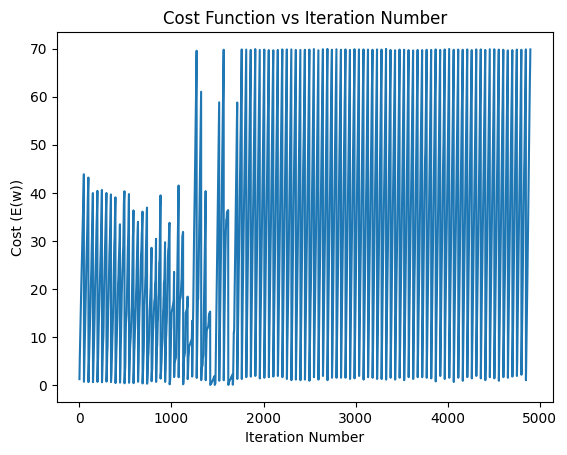

In [34]:
plt.plot(costs_mini_batch)
plt.xlabel('Iteration Number')
plt.ylabel('Cost (E(w))')
plt.title('Cost Function vs Iteration Number')
plt.show()

In [35]:
# Assuming you already have the trained weights W1, b1, W2, b2 from the training phase
# Also assuming the sign function is available

# Forward propagation to make predictions on the training set
_, _, _, _, train_predictions = forward_propagation(X_train, W1_mini_batch, b1_mini_batch, W2_mini_batch, b2_mini_batch)

# Convert predictions to binary labels using the sign function
binary_train_predictions = np.sign(train_predictions)

# Calculate Ein (classification error on the training set)
ein = np.mean(binary_train_predictions != Y_train)
print(f"Ein (Training Error): {ein * 100:.2f}%")

# Load and preprocess the test dataset
test_data = pd.read_csv('ZipDigits.test', header=None, delim_whitespace=True)
test_data_binary = test_data[test_data[0].isin([1, 5])]
test_data_binary[0] = test_data_binary[0].apply(lambda x: 1 if x == 1 else -1)
X_test = test_data_binary.iloc[:, 1:].values.T / 255.0  # Normalize the pixel values
Y_test = test_data_binary.iloc[:, 0].values.reshape(1, -1)

# Forward propagation to make predictions on the test set
_, _, _, _, test_predictions = forward_propagation(X_test, W1_mini_batch, b1_mini_batch, W2_mini_batch, b2_mini_batch)

# Convert predictions to binary labels using the sign function
binary_test_predictions = np.sign(test_predictions)

# Calculate the test error
test_error = np.mean(binary_test_predictions != Y_test)
print(f"Test Error: {test_error * 100:.2f}%")


Ein (Training Error): 35.62%
Test Error: 37.74%


<ipython-input-35-9e3c442fbb0c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_binary[0] = test_data_binary[0].apply(lambda x: 1 if x == 1 else -1)
